# Main Project: Transfer learning

Course: 8P361  &emsp;&emsp;  Group: 10

Helgers, V.M.J. &nbsp;&emsp;&emsp; 1329332 <br>
Jong, de R.L.P.D. &nbsp;&nbsp;&emsp; 1328328 <br>
Korsten, T. &nbsp;&nbsp;&nbsp;&nbsp;&emsp;&emsp;&emsp; 1340522 <br>
Moharir, S. &emsp;&emsp;&emsp;&emsp; 1296256 <br>



## Important notes

1. Note that all functions needed to execute this notebook can be found in the transfer.py file. Therefore this notebook can only be executed with the use of this adjusted transfer.py file.

2. If one wants to run this notebook it is important to add the right path to the image data within the function 'get_pcam_generators' which is called below.

### 2.1 Import the necessary functions

In [5]:
#https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38
from transfer_learning import get_pcam_generators, get_model, train_model

### 2.2 Get the models
Get the models that need to be trained. Model 1 initialized by the ImageNet weights and model 2 being randomly initialized

In [6]:
model = get_model('imagenet')
#model2 = get_model(None)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


### 2.3 Get the data generators

In [7]:
train_gen, val_gen = get_pcam_generators('data')

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


### 2.4 Training the models
The imputs for the training function are the model to be trained, the generated training and validation sets, and the name of the model.

In [8]:
train_model(model,train_gen,val_gen,'transfer_imagenet')

Epoch 1/10
225/225 [==============================] - 40s 144ms/step - loss: 0.5698 - accuracy: 0.7446 - val_loss: 1.5763 - val_accuracy: 0.5075

Epoch 00001: val_loss improved from inf to 1.57635, saving model to transfer_imagenet_weights.hdf5
Epoch 2/10
225/225 [==============================] - 28s 124ms/step - loss: 0.3631 - accuracy: 0.8623 - val_loss: 0.9617 - val_accuracy: 0.4638

Epoch 00002: val_loss improved from 1.57635 to 0.96174, saving model to transfer_imagenet_weights.hdf5
Epoch 3/10
225/225 [==============================] - 26s 117ms/step - loss: 0.3017 - accuracy: 0.8827 - val_loss: 1.3403 - val_accuracy: 0.7312

Epoch 00003: val_loss did not improve from 0.96174
Epoch 4/10
225/225 [==============================] - 26s 116ms/step - loss: 0.2670 - accuracy: 0.9000 - val_loss: 1.1583 - val_accuracy: 0.7163

Epoch 00004: val_loss did not improve from 0.96174
Epoch 5/10
225/225 [==============================] - 28s 124ms/step - loss: 0.2360 - accuracy: 0.9035 - val_los

In [2]:
from Analysis import ROC_curve, analysis

In [3]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('transfer_imagenet.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("transfer_imagenet_weights.hdf5")
print("Loaded model from disk")

Loaded model from disk


In [4]:
train_genF, val_genF = get_pcam_generators('data',shuffle=False)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


/home/8p361-lecturer/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


0.9261489309412632 0.9411091325362503


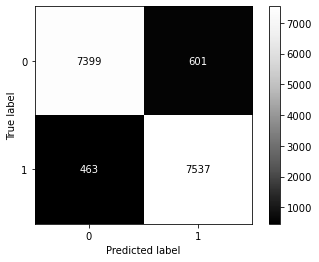

In [5]:
analysis(loaded_model,val_genF)

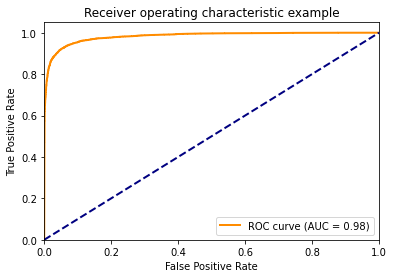

In [6]:
ROC_curve(loaded_model,val_genF)